In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tqdm import tqdm

## Group 7
### dkhffdksfh
### dhjakfhjadf
### 012228451 - Jasper De Landsheere

### Import data

In [43]:
df = pd.read_csv("diterpene_shuf.csv")
df

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45c
0,2,4,8,6,v1493,t,139.2,q,33.2,d,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,2,4,8,6,v1255,d,144.0,q,66.7,d,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,2,4,8,6,v2194,d,30.7,t,26.8,t,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,3,4,9,4,v2021,t,37.2,t,17.4,q,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,3,4,9,4,v1051,q,12.2,d,154.6,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2,3,8,7,v501,q,18.8,t,32.5,d,...,172.1,q,62.3,d,36.1,t,27.0,s,38.8,54c
1198,2,4,8,6,v785,q,60.6,t,29.3,t,...,59.1,s,39.7,d,142.6,q,18.8,d,36.2,54c
1199,2,4,8,6,v2174,q,166.1,q,62.5,s,...,44.5,d,55.6,d,147.3,q,107.0,t,47.1,52c
1200,2,4,8,6,v1332,t,36.5,d,46.4,t,...,17.3,t,120.4,q,17.8,d,144.4,t,35.9,54c


# Data exploration and preprocessing

### Short explaination of the dataset

*Each diterpene is described with NMR spectroscopy. In this dataset each spectrum is described by the frequency and multiplicity of all peaks. The skeleton of every diterpene contains 20 carbon atoms. So, for every carbon atom we have its frequency and multiplicity. For multiplicity we have s(singulet), d(doublet), t(triplet), q(quartet). If an atom of carbon is connected to no hydrogen atoms its singulet, if its connected to one hydrogen its doublet, two hydrogens triplet and three hydrogens connected to one carbon atom is quartet.*

- Columns a0 to a3 represent how many times s,d,t,q values have accured.
- Column a4 is sample id.
- Columns a5 to a44 tells us the frequency and multiplictiy of each carbon atom.
- Column a45c represents the classification class.

Example, for sample 0:
In a5 to a44, 's' value has occured 2 times, 'd' 4 times, 't' 8 times and 'q' 6 times. 'v1493' is its ID value. Then for the next 40 columns we have for each of the 20 carbon atoms its multiplicity (s,d,t,q) and frequency. Finally, in a45c we can see that sample 0 belongs to class 52c. 

--------------------
### Rename according exercise

In [44]:
# Drop first four columns as they are not needed according to the excercise
df = df.drop(["a0", "a1", "a2", "a3"], axis=1)
# Rename column "a45c" to "Class", "a4" to "ID"
df = df.rename(columns={"a45c": "Class", "a4": "ID"})
# Inspect
df.head()

,ID,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
0,v1493,t,139.2,q,33.2,d,30.7,d,49.6,t,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,v1255,d,144.0,q,66.7,d,46.2,t,32.7,q,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,v2194,d,30.7,t,26.8,t,41.2,t,139.3,q,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,v2021,t,37.2,t,17.4,q,16.7,s,58.1,t,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,v1051,q,12.2,d,154.6,t,18.7,t,37.1,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c


-------------------------
### Basic exploration

In [45]:
# Basic information about the data
df.describe()

,a6,a8,a10,a12,a14,a16,a18,a20,a22,a24,a26,a28,a30,a32,a34,a36,a38,a40,a42,a44
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,56.387155,59.147687,59.999551,58.874193,59.536389,59.597471,57.309401,58.728378,55.568128,57.278544,58.794725,56.415308,61.136672,59.793536,58.655524,60.627945,58.849384,57.287329,60.231140,57.614401
std,43.868545,45.930797,46.909051,45.465840,46.522244,45.921470,43.398889,44.909447,43.476958,45.148903,46.448512,44.489723,47.351395,44.805028,45.697774,46.396705,46.498059,44.742240,47.950173,44.897128
min,7.300000,7.900000,11.600000,7.500000,7.700000,7.500000,7.600000,9.200000,7.500000,6.800000,11.800000,11.600000,8.000000,7.600000,2.400000,7.800000,7.900000,8.100000,7.900000,7.700000
25%,27.800000,28.200000,27.725000,28.425000,27.700000,28.725000,27.875000,28.302500,28.050000,28.100000,26.625000,27.025000,28.550000,30.300000,28.700000,30.625000,28.300000,27.302500,28.225000,28.225000
50%,39.600000,41.400000,41.200000,40.400000,41.300000,41.000000,39.925000,40.500000,39.600000,40.400000,40.215000,39.500000,41.400000,41.200000,40.700000,42.000000,40.050000,39.700000,40.700000,40.400000
75%,66.700000,71.800000,73.187500,72.700000,72.975000,72.175000,71.975000,72.100000,64.160000,65.775000,71.900000,65.375000,74.600000,72.600000,69.900000,72.575000,71.175000,68.825000,72.075000,70.200000
max,216.630000,219.100000,220.700000,216.900000,224.700000,221.250000,223.000000,222.700000,222.100000,218.300000,222.500000,215.270000,220.200000,216.900000,218.000000,216.400000,224.500000,216.100000,217.460000,219.300000


In [46]:
# Number of unique values in each column
df.nunique()

ID       1202
a5          4
a6        711
a7          4
a8        728
a9          4
a10       724
a11         4
a12       719
a13         4
a14       725
a15         4
a16       725
a17         4
a18       712
a19         4
a20       721
a21         4
a22       702
a23         4
a24       686
a25         4
a26       726
a27         4
a28       687
a29         4
a30       741
a31         4
a32       729
a33         4
a34       711
a35         4
a36       720
a37         4
a38       720
a39         4
a40       701
a41         4
a42       726
a43         4
a44       710
Class      22
dtype: int64

In [47]:
# Check for missing values
df.isnull().sum()

ID       0
a5       0
a6       0
a7       0
a8       0
a9       0
a10      0
a11      0
a12      0
a13      0
a14      0
a15      0
a16      0
a17      0
a18      0
a19      0
a20      0
a21      0
a22      0
a23      0
a24      0
a25      0
a26      0
a27      0
a28      0
a29      0
a30      0
a31      0
a32      0
a33      0
a34      0
a35      0
a36      0
a37      0
a38      0
a39      0
a40      0
a41      0
a42      0
a43      0
a44      0
Class    0
dtype: int64

-----------
### Data visualization

<Axes: xlabel='Class', ylabel='count'>

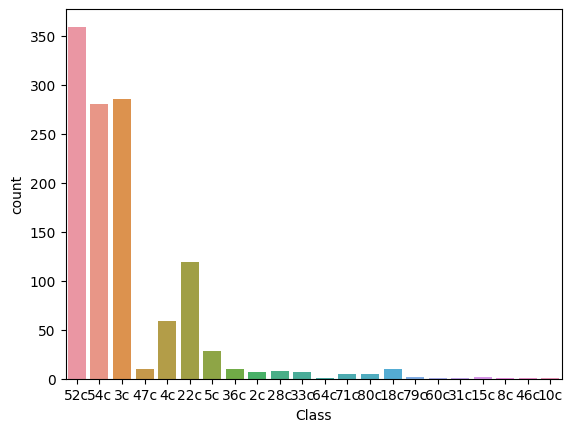

In [48]:
# Distribution of values in the "Class" column
sns.countplot(x="Class", data=df)

Here, we noticed that the classes are very imbalanced. For now, we keep this in mind. Further preprocessing steps to deal with this might be necessary.

array([[<Axes: title={'center': 'a6'}>, <Axes: title={'center': 'a8'}>,
        <Axes: title={'center': 'a10'}>, <Axes: title={'center': 'a12'}>],
       [<Axes: title={'center': 'a14'}>, <Axes: title={'center': 'a16'}>,
        <Axes: title={'center': 'a18'}>, <Axes: title={'center': 'a20'}>],
       [<Axes: title={'center': 'a22'}>, <Axes: title={'center': 'a24'}>,
        <Axes: title={'center': 'a26'}>, <Axes: title={'center': 'a28'}>],
       [<Axes: title={'center': 'a30'}>, <Axes: title={'center': 'a32'}>,
        <Axes: title={'center': 'a34'}>, <Axes: title={'center': 'a36'}>],
       [<Axes: title={'center': 'a38'}>, <Axes: title={'center': 'a40'}>,
        <Axes: title={'center': 'a42'}>, <Axes: title={'center': 'a44'}>]],
      dtype=object)

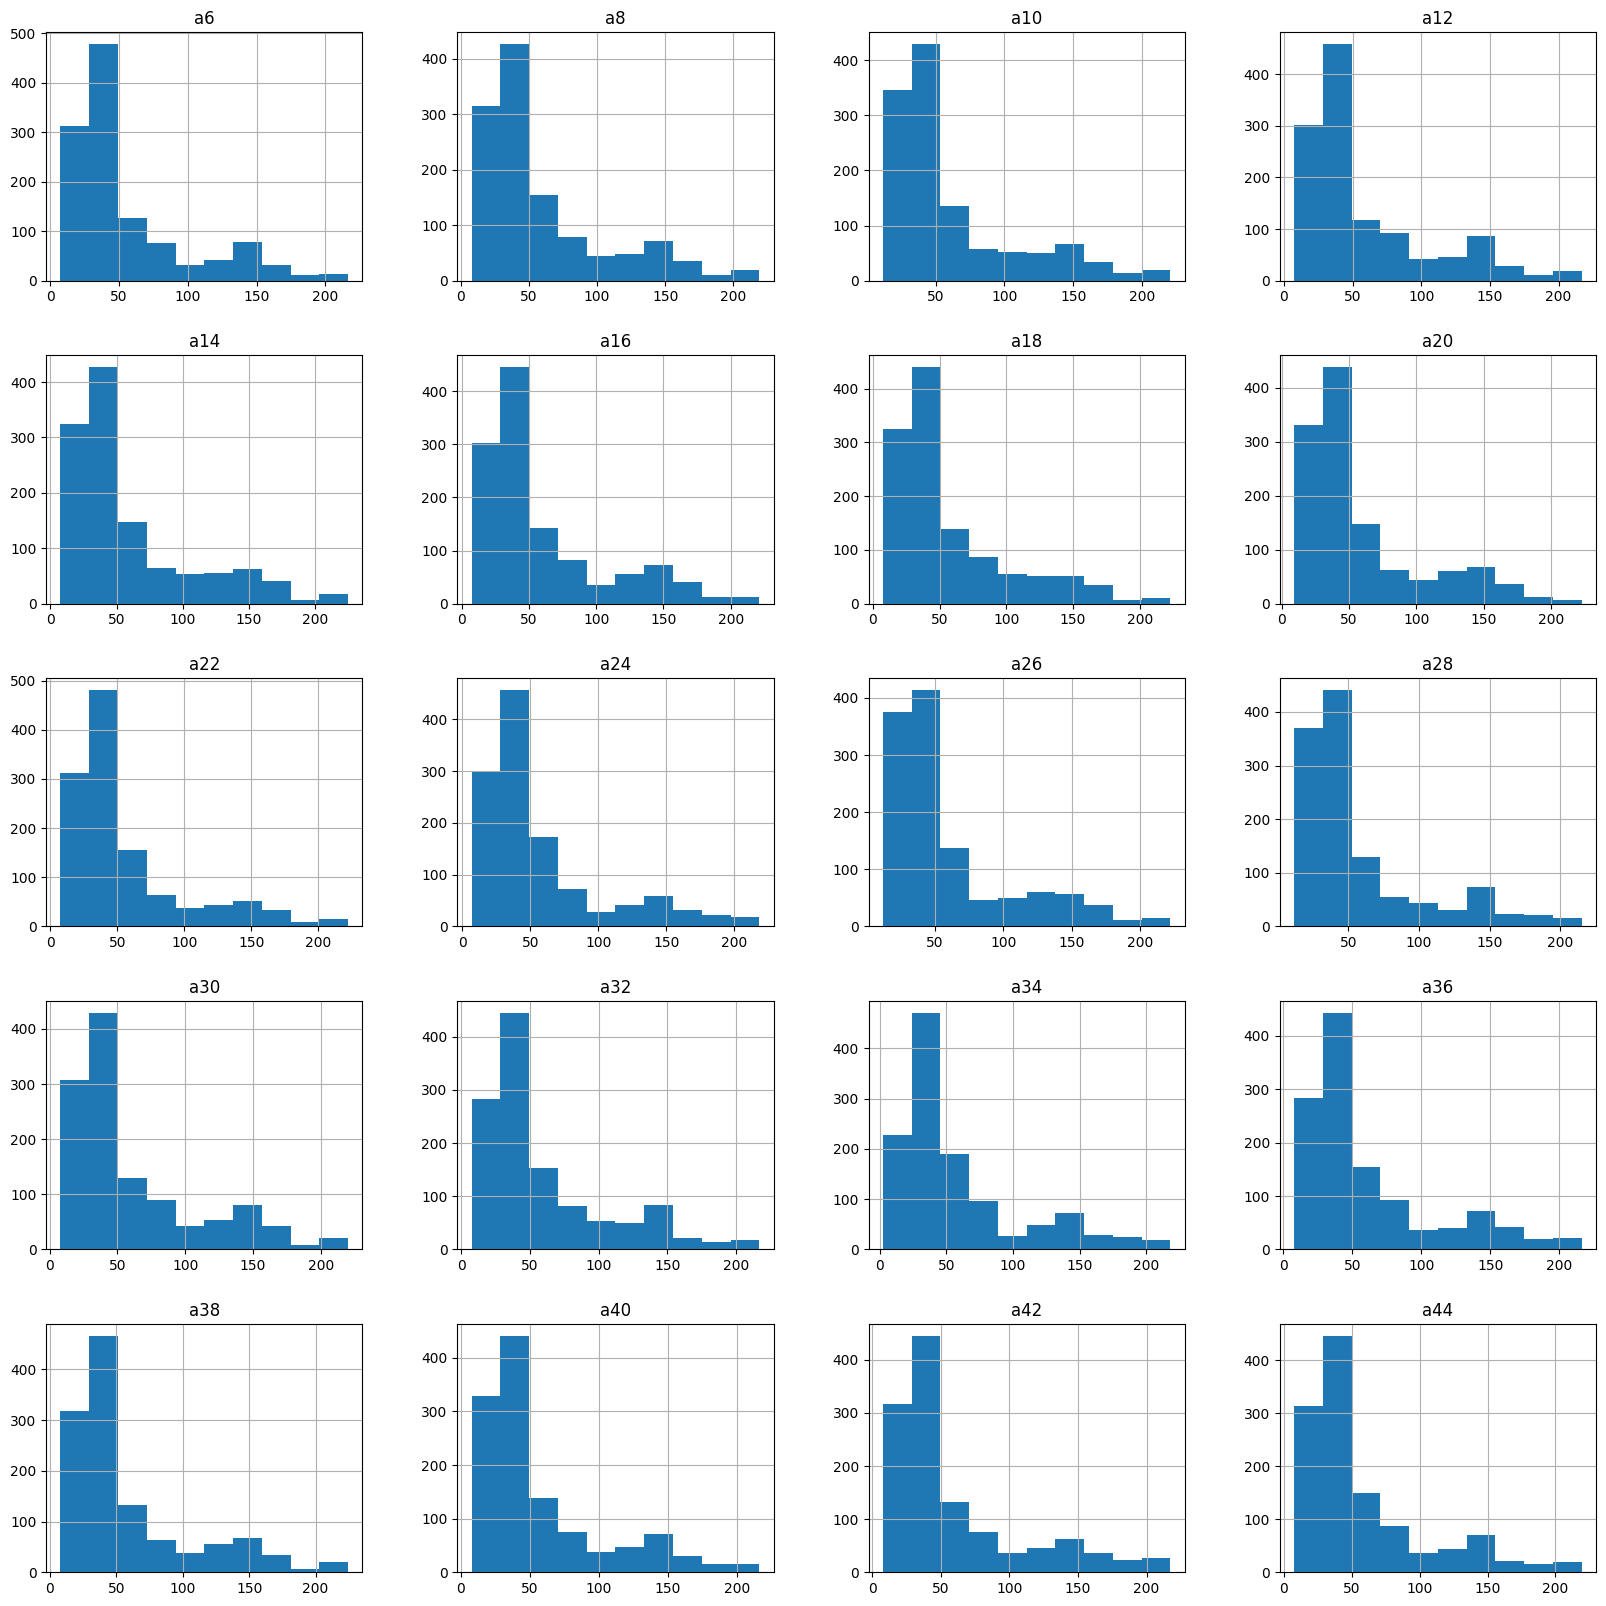

In [49]:
# Plot distribution of each column
df.hist(figsize=(20,20))

We notice that all frequencies are very similarly distributed.

------------------------

In [50]:
df_reduced = df.copy()

In [51]:
#for each sample of the dataset
col_names = df_reduced.columns
for i in tqdm(range(len(df_reduced))):
    
    for j in range (len(col_names)):

        if df_reduced[col_names[j]][i] == 's' and df_reduced[col_names[j+1]][i] >= 64.5 and df_reduced[col_names[j+1]][i] <= 95:
            df_reduced[col_names[j]][i] = 'd'

        if df_reduced[col_names[j]][i] == 's' and df_reduced[col_names[j+1]][i] >= 96 and df_reduced[col_names[j+1]][i] <= 114:
            df_reduced[col_names[j]][i] = 't'

        if df_reduced[col_names[j]][i] == 's' and df_reduced[col_names[j+1]][i] >= 115 and df_reduced[col_names[j+1]][i] <= 165:
            df_reduced[col_names[j]][i] = 'd'

        if df_reduced[col_names[j]][i] == 's' and df_reduced[col_names[j+1]][i] >= 165 and df_reduced[col_names[j+1]][i] <= 188:
            df_reduced[col_names[j]][i] = 'q'

        if df_reduced[col_names[j]][i] == 's' and df_reduced[col_names[j+1]][i] >= 188 and df_reduced[col_names[j+1]][i] <= math.inf:
            df_reduced[col_names[j]][i] = 't'


        if df_reduced[col_names[j]][i] == 'd' and df_reduced[col_names[j+1]][i] >= 64.5 and df_reduced[col_names[j+1]][i] <= 95:
            df_reduced[col_names[j]][i] = 't'

        if df_reduced[col_names[j]][i] == 'd' and df_reduced[col_names[j+1]][i] >= 105 and df_reduced[col_names[j+1]][i] <= 180:
            df_reduced[col_names[j]][i] = 't'

        if df_reduced[col_names[j]][i] == 'd' and df_reduced[col_names[j+1]][i] >= 96 and df_reduced[col_names[j+1]][i] <= 104:
            df_reduced[col_names[j]][i] = 'q'

        if df_reduced[col_names[j]][i] == 'd' and df_reduced[col_names[j+1]][i] >= 180 and df_reduced[col_names[j+1]][i] <= math.inf:
            df_reduced[col_names[j]][i] = 'q'


        if df_reduced[col_names[j]][i] == 't' and df_reduced[col_names[j+1]][i] >= 59 and df_reduced[col_names[j+1]][i] <= 90:
            df_reduced[col_names[j]][i] = 'q'

        if df_reduced[col_names[j]][i] == 't' and df_reduced[col_names[j+1]][i] >= 90 and df_reduced[col_names[j+1]][i] <= math.inf:
            df_reduced[col_names[j]][i] = 'q'

  0%|          | 0/1202 [00:00<?, ?it/s]/var/folders/hh/sttqgfc14zd8w_nyvlqd01780000gn/T/ipykernel_44685/4047839485.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[col_names[j]][i] = 'q'
/var/folders/hh/sttqgfc14zd8w_nyvlqd01780000gn/T/ipykernel_44685/4047839485.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[col_names[j]][i] = 't'
/var/folders/hh/sttqgfc14zd8w_nyvlqd01780000gn/T/ipykernel_44685/4047839485.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [52]:
df_reduced

,ID,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
0,v1493,q,139.2,q,33.2,d,30.7,d,49.6,t,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,v1255,q,144.0,q,66.7,d,46.2,t,32.7,q,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,v2194,d,30.7,t,26.8,t,41.2,q,139.3,q,...,16.7,t,35.4,q,65.8,s,42.4,q,139.8,54c
3,v2021,t,37.2,t,17.4,q,16.7,s,58.1,t,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,v1051,q,12.2,q,154.6,t,18.7,t,37.1,q,...,49.5,t,38.8,q,71.4,s,36.8,s,46.2,3c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,v501,q,18.8,t,32.5,q,143.1,q,15.7,q,...,172.1,q,62.3,d,36.1,t,27.0,s,38.8,54c
1198,v785,q,60.6,t,29.3,t,38.7,d,47.6,q,...,59.1,s,39.7,q,142.6,q,18.8,d,36.2,54c
1199,v2174,q,166.1,q,62.5,s,34.6,t,37.9,q,...,44.5,d,55.6,q,147.3,q,107.0,t,47.1,52c
1200,v1332,t,36.5,d,46.4,t,27.5,t,35.5,q,...,17.3,q,120.4,q,17.8,q,144.4,t,35.9,54c


To deal with the categorical features, we opt for one hot encoding over label encoding, as we are not sure yet how the multiplicities work.